# Análise Comercial e de Eventos
Este notebook explora dados de clientes, pedidos, vendas, faturas e vendedores,
com o objetivo de identificar padrões de receita, performance e engajamento.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
clientes_df = pd.read_csv('../dados/clientes.csv')
eventos_df = pd.read_csv('../dados/eventos.csv')
faturas_df = pd.read_csv('../dados/faturas.csv')
item_vendas_df = pd.read_csv('../dados/item_vendas.csv')
pedidos_df = pd.read_csv('../dados/pedidos.csv')
vendedores_df = pd.read_csv('../dados/vendedores.csv')

In [4]:
for nome, df in {
    "Clientes": clientes_df,
    "Eventos": eventos_df,
    "Faturas": faturas_df,
    "Pedidos": pedidos_df,
    "Vendas": item_vendas_df,
    "Vendedores": vendedores_df,
}.items():
    print(f"{nome}: {df.shape[0]} linhas, {df.shape[1]} colunas")


Clientes: 25000 linhas, 9 colunas
Eventos: 20 linhas, 10 colunas
Faturas: 80000 linhas, 7 colunas
Pedidos: 120000 linhas, 5 colunas
Vendas: 274780 linhas, 14 colunas
Vendedores: 200 linhas, 4 colunas


## 🧩 Receita mensal e taxa de crescimento

**Filtro:**  
`status_pedido = 'ganho'` e `status_pagamento = 'confirmado'`

**Base:**  
`item_vendas_df` *(colunas: valor_total, data_pagamento)*

---

### 🔍 Análises
- Receita total confirmada por mês  
- Crescimento percentual mês a mês  
- Identificação de meses de pico ou queda na performance  

---

### 📊 Gráficos
- **Painel A:** Linha da receita mensal (com pontos e grade para destacar variações)  
- **Painel B (opcional):** Linha da taxa de crescimento percentual por mês  

---

### 💬 Interpretação esperada
A análise mostra a **evolução do faturamento ao longo do tempo**, evidenciando sazonalidade, tendência e meses de maior conversão.  
Serve como ponto de partida para entender **ciclos de venda, impacto de eventos e períodos de alta demanda.**


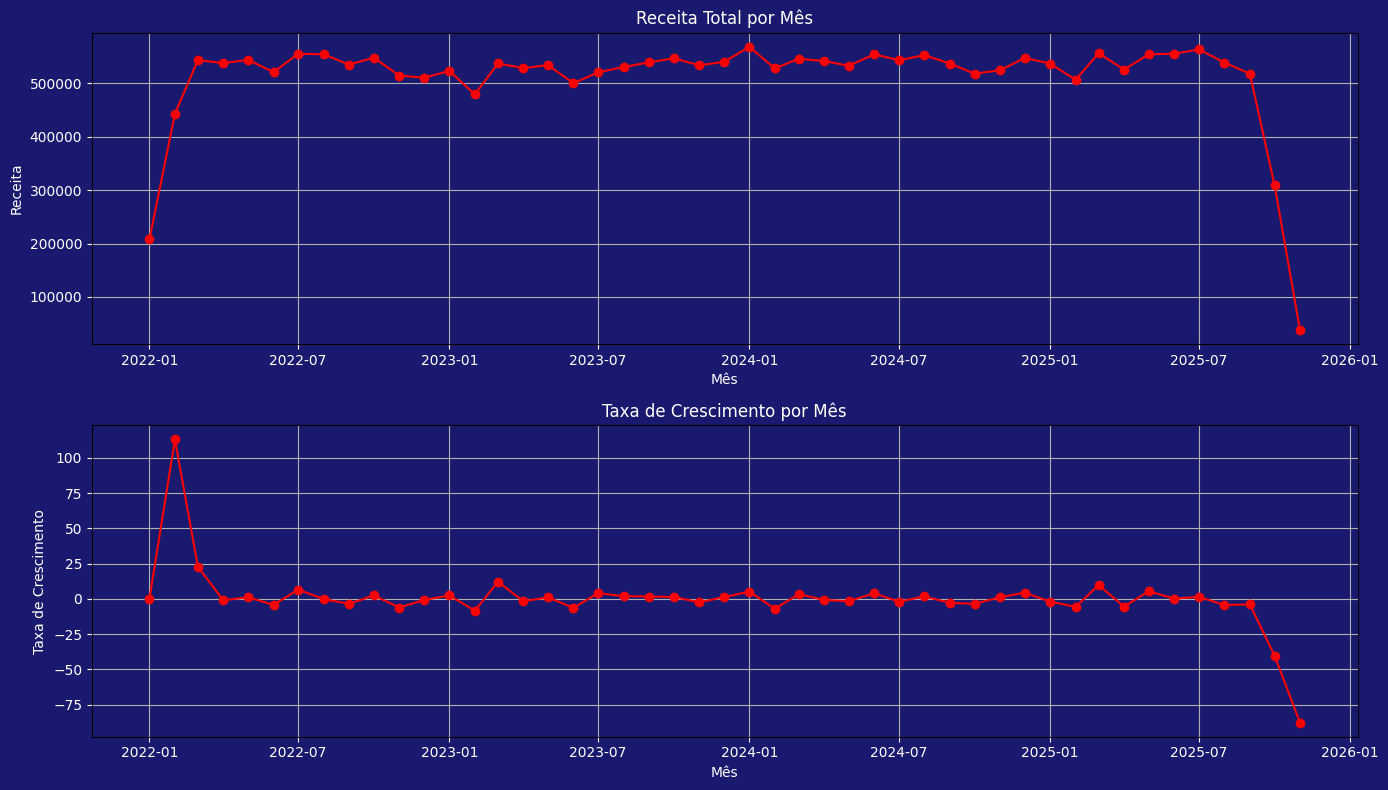

In [44]:
"""Receita Mensal e Taxa de Crescimento"""

receita_mensal_e_taxa = (
    item_vendas_df[['data_pagamento', 'valor_total', 'id_pedido', 'status_pagamento']].merge(
    pedidos_df[['id_pedido', 'status_pedido']], on='id_pedido', how='inner')
)
receita_mensal_e_taxa['data_pagamento'] = pd.to_datetime(receita_mensal_e_taxa['data_pagamento'])

receita_mensal_e_taxa = (
    receita_mensal_e_taxa.loc[(receita_mensal_e_taxa['status_pagamento'] == 'confirmado') 
    & (receita_mensal_e_taxa['status_pedido'] == 'ganho')]
    .groupby(receita_mensal_e_taxa['data_pagamento'].dt.to_period('M'))['valor_total']
    .sum()
    .reset_index()
    .rename(columns={
        'data_pagamento': 'Período',
        'valor_total': 'Receita Mensal'
    })
)

receita_mensal_e_taxa['Taxa Crescimento'] = (
    receita_mensal_e_taxa['Receita Mensal'].pct_change().fillna(0) * 100
).round(2)

receita_mensal_e_taxa['Período'] = receita_mensal_e_taxa['Período'].dt.to_timestamp()

plt.rcParams['figure.facecolor'] = '#191970'
plt.rcParams['axes.facecolor'] = '#191970'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'


fig, ax = plt.subplots(2, figsize=(14,8))

ax[0].plot(
    receita_mensal_e_taxa['Período'],
    receita_mensal_e_taxa['Receita Mensal'],
    color='red',
    marker='o'
)

ax[0].set_title('Receita Total por Mês')
ax[0].set_xlabel('Mês')
ax[0].set_ylabel('Receita')
ax[0].grid()


ax[1].plot(
    receita_mensal_e_taxa['Período'],
    receita_mensal_e_taxa['Taxa Crescimento'],
    color='red',
    marker='o'
)

ax[1].set_title('Taxa de Crescimento por Mês')
ax[1].set_xlabel('Mês')
ax[1].set_ylabel('Taxa de Crescimento')
ax[1].grid()

plt.tight_layout()
plt.show()


## 🧩 Ticket médio por cliente e por pedido

**Filtro:**  
`status_pedido = 'ganho'` e `status_pagamento = 'confirmado'`

**Base:**  
`item_vendas_df` *(colunas: id_cliente, id_pedido, valor_total)*

---

### 🔍 Análises
- Calcular a **receita total confirmada** por cliente.  
- Calcular o **ticket médio por cliente** (`receita / nº de pedidos`).  
- Calcular o **ticket médio por pedido** (`valor_total médio por pedido`).  
- Comparar os dois resultados para entender o comportamento de compra.

---

### 📊 Gráficos
- **Painel A:** Barras comparando o ticket médio por cliente e por pedido.  
- **Painel B (opcional):** Distribuição do ticket médio por cliente (histograma).  

---

### 💬 Interpretação esperada
Esta análise identifica **quanto cada cliente gasta em média** e **quanto vale cada pedido**.  
Ajuda a entender o perfil de consumo, detectar **clientes de alto valor**, e avaliar **oportunidades de aumento de ticket** por meio de ofertas, upsell ou personalização.
